PHAN TICH VA TRUC QUAN HOA DU LIEU (DS201)

---
# BUOI 04 - TRỰC QUAN DỮ LIỆU
6 - NGUYEN DIEU PHUONG (DS201.O11.1)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Câu 1: Tạo data frame

In [11]:
data_path = "data\Canada.xlsx"
df = pd.read_excel(
    data_path,
    sheet_name = "Canada by Citizenship",
    skiprows = range(20),
    skipfooter = 2)

In [12]:
## Xuất 5 sample đầu tiên
df.head(5)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [13]:
print(f"The number of samples  in dataset: {len(df)}")
print(f"The number of features in dataset: {len(df.columns)}")

The number of samples  in dataset: 195
The number of features in dataset: 43


## Câu 2: Đổi tên cột

In [14]:
df.rename(columns= {
    'OdName': 'Country',
    'AreaName': 'Continent',
    'RegName': 'Region'
},  inplace=True)
df.drop(columns=['AREA', 'REG', 'DEV', 'Type', 'Coverage'],
        inplace= True)

In [15]:
print(f"The number of samples  in dataset: {len(df)}")
print(f"The number of features in dataset: {len(df.columns)}")

The number of samples  in dataset: 195
The number of features in dataset: 38


In [16]:
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


## Câu 3: Tạo thêm cột total

In [17]:
df['Total'] = df.iloc[:,4:].sum(axis = 1)
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


## Câu 4: Chuyển country thành index

In [18]:
df.set_index('Country', inplace= True)
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


## Câu 5: Truy vấn theo country

In [19]:
years = range(1980, 2014)
years

range(1980, 2014)

In [20]:
def df_country(df: pd.DataFrame, country: str, y: list):
    return df.loc[country, y]

In [21]:
df_country(df, country='Japan', y = years)

1980     701
1981     756
1982     598
1983     309
1984     246
1985     198
1986     248
1987     422
1988     324
1989     494
1990     379
1991     506
1992     605
1993     907
1994     956
1995     826
1996     994
1997     924
1998     897
1999    1083
2000    1010
2001    1092
2002     806
2003     817
2004     973
2005    1067
2006    1212
2007    1250
2008    1284
2009    1194
2010    1168
2011    1265
2012    1214
2013     982
Name: Japan, dtype: object

## Câu 6: Plot di cư đến Canada của Hati và Japan

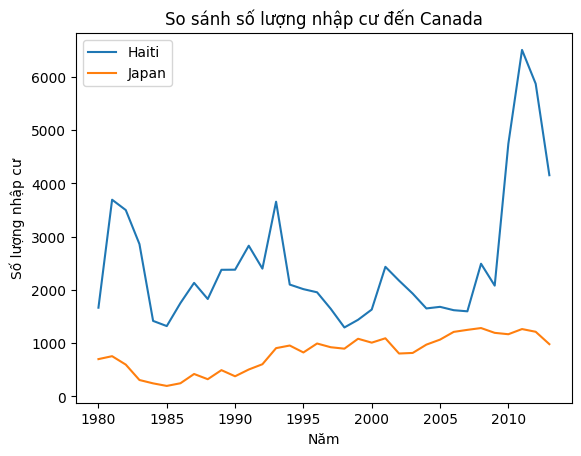

In [22]:
df_country(df, 'Haiti', years).plot(kind = 'line')
df_country(df, 'Japan', years).plot(kind = 'line')
plt.xlabel('Năm')
plt.ylabel('Số lượng nhập cư')
plt.title('So sánh số lượng nhập cư đến Canada')
plt.legend()

## Câu 7: Plot xu hướng của 5 quốc gia nhập cư cao nhất 

In [41]:
years = range(1980, 2014)
max_countries = df.sort_values(['Total'], ascending= False).head(5).index
max_countries

Index(['India', 'China',
       'United Kingdom of Great Britain and Northern Ireland', 'Philippines',
       'Pakistan'],
      dtype='object', name='Country')

Text(0.5, 1.0, '')

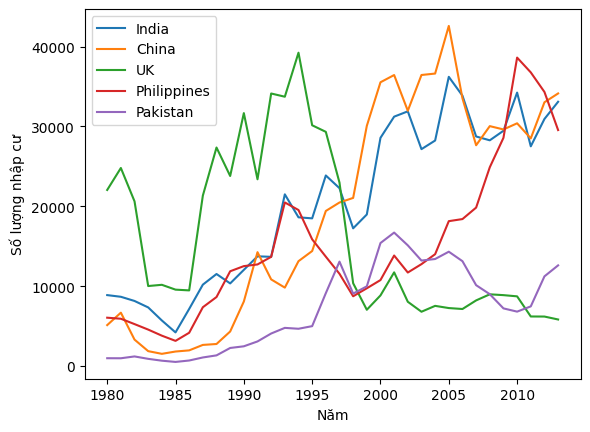

In [44]:
for i in range(len(max_countries)):
    df_country(df, max_countries[i], years)\
        .plot(kind = 'line')
    plt.xlabel('Năm')
    plt.ylabel('Số lượng nhập cư')

plt.legend(['India', 'China', 'UK', 'Philippines', 'Pakistan'])
plt.title('')

## Câu 8: Plot xu hướng của 5 quốc gia nhập cư thấp nhất 

In [47]:
years = range(1980, 2014)
min_countries = df.sort_values(['Total'], ascending= True).head(5).index
min_countries

Index(['Palau', 'Marshall Islands', 'Western Sahara', 'San Marino',
       'New Caledonia'],
      dtype='object', name='Country')

Text(0.5, 1.0, '')

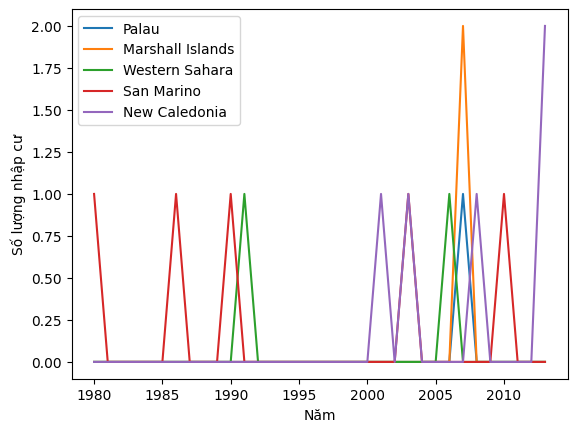

In [48]:
for i in range(len(min_countries)):
    df_country(df, min_countries[i], years)\
        .plot(kind = 'line')
    plt.xlabel('Năm')
    plt.ylabel('Số lượng nhập cư')

plt.legend()
plt.title('')

## Câu 9: Tần suất di cư đến Canada năm 2010, 2011, 2012, 2013

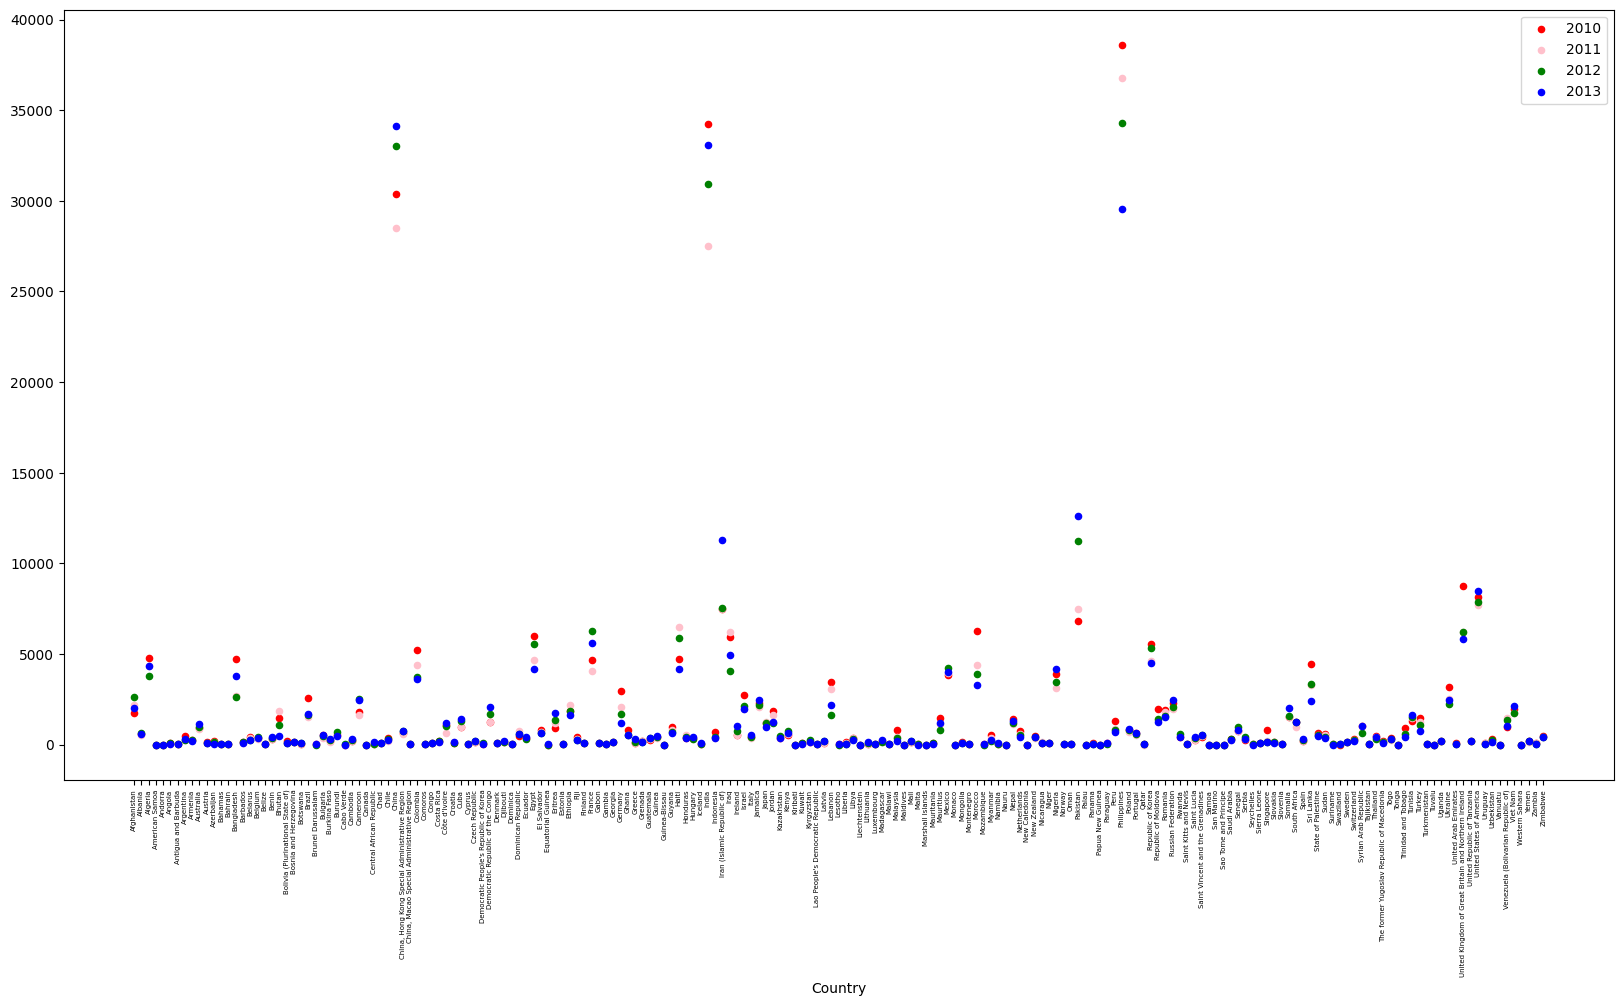

In [102]:
ax1 = df.reset_index().plot(kind = 'scatter', x = 'Country', y = 2010, rot=90, figsize=(20,10), color = 'red', label = '2010')
ax2 = df.reset_index().plot(kind = 'scatter', x = 'Country', y = 2011, rot=90, figsize=(20,10), color = 'pink', label = '2011', ax = ax1)
ax3 = df.reset_index().plot(kind = 'scatter', x = 'Country', y = 2012, rot=90, figsize=(20,10), color = 'green', label = '2012', ax = ax1)
ax2 = df.reset_index().plot(kind = 'scatter', x = 'Country', y = 2013, rot=90, figsize=(20,10), color = 'blue', label = '2013', ax = ax1)

plt.xticks(fontsize=5)
plt.xlabel('Country')
plt.ylabel('')
plt.legend()


## Câu 10: Tỉ lệ nhập cư của mỗi lục địa

C:\Users\ndp17\AppData\Local\Temp\ipykernel_25948\1660562149.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df_continent = df.groupby('Continent', axis = 0).sum()


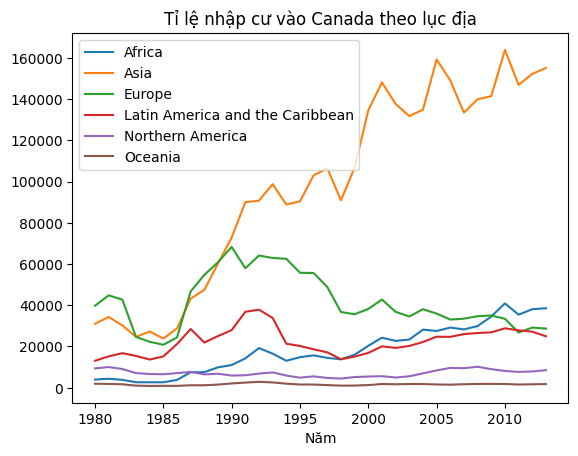

In [120]:
df_continent = df.groupby('Continent', axis = 0).sum()

for i in df_continent.index:
    df_continent.loc[i, range(1980,2014)]\
    .plot(kind = 'line')

plt.xlabel('Năm')
plt.ylabel('')
plt.title('Tỉ lệ nhập cư vào Canada theo lục địa')
plt.legend()